In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import env

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [8]:
def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [9]:
# read the data into df
df = get_mallcustomer_data()

In [10]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Using this lesson as a guide, perform clustering on the iris dataset.

Choose features -- age and annual income
Visualize the results of your clustering. --
Use the elbow method to visually select a good value for k.--5
Repeat the clustering, this time with 3 different features.

df.age and df.annual_income

In [11]:
# choosing my features
X = df[['age', 'annual_income']]

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>]], dtype=object)

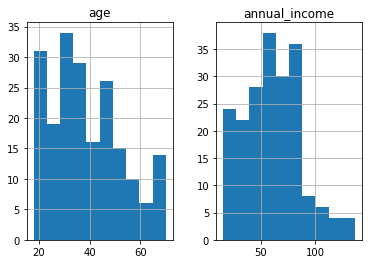

In [59]:
# look at distribution of sepal length and petal_length

X.hist()

In [60]:
# Scale the X
# make our thing, fit our thing
scaler = MinMaxScaler().fit(X)
# use the thing
X_scaled = pd.DataFrame(
    scaler.transform(X),
    columns= X.columns).set_index([X.index.values])

In [61]:
# look at the head
X_scaled.head()

,age,annual_income
1,0.019231,0.000000
2,0.057692,0.000000
3,0.038462,0.008197
4,0.096154,0.008197
5,0.250000,0.016393


In [63]:
# make a new column names cluster in df and X_scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [64]:
# lets look at sample of the df

df.sample(20)

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
146,Male,28,77,97,1
190,Female,36,103,85,1
158,Female,30,78,78,1
35,Female,49,33,14,0
164,Female,31,81,93,1
33,Male,53,33,4,0
15,Male,37,20,13,2
66,Male,18,48,59,2
155,Female,47,78,16,1


In [65]:
df.groupby('cluster')

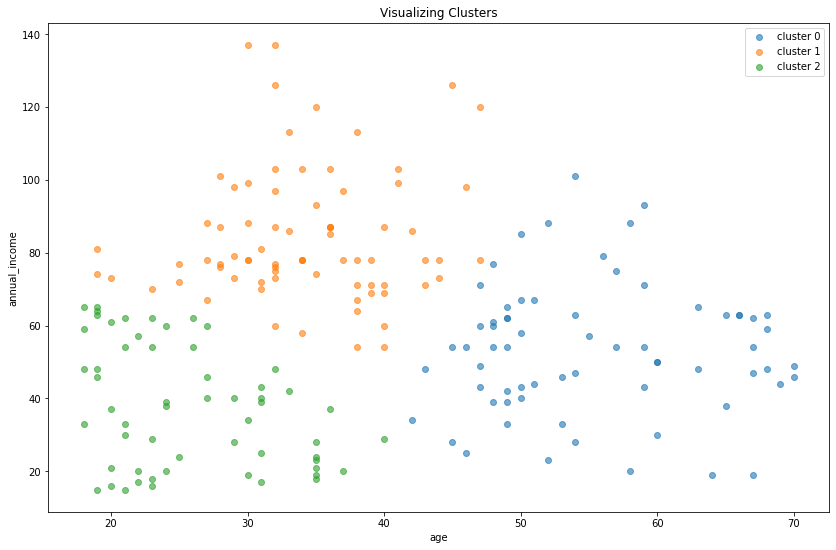

In [68]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Clusters')
plt.show()



In [69]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.71756602, 0.3126988 ],
       [0.31098178, 0.56794651],
       [0.14878543, 0.18550475]])

In [62]:
#first I'll try it on scaled data
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [70]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,annual_income
0,0.717566,0.312699
1,0.310982,0.567947
2,0.148785,0.185505


In [71]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.71756602, 0.3126988 ],
       [0.31098178, 0.56794651],
       [0.14878543, 0.18550475]])

In [72]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,annual_income
0,0.717566,0.312699
1,0.310982,0.567947
2,0.148785,0.185505


In [73]:
df.groupby('cluster')['age', 'annual_income'].mean()

,age,annual_income
cluster,,
0,55.313433,53.149254
1,34.171053,84.289474
2,25.736842,37.631579


In [75]:
# Centriods for unscaled data?
centroids = df.groupby('cluster')['age', 'annual_income'].mean()
centroids

,age,annual_income
cluster,,
0,55.313433,53.149254
1,34.171053,84.289474
2,25.736842,37.631579


In [76]:
# Another way to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[55.31343284, 53.14925373],
       [34.17105263, 84.28947368],
       [25.73684211, 37.63157895]])

Text(0.5, 1.0, 'Visualizing Cluster Centers')

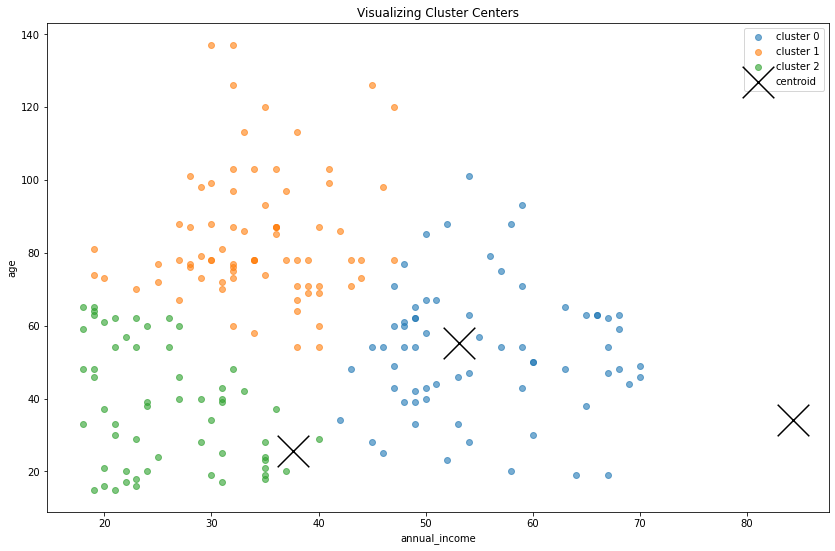

In [78]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

In [ ]:
## mini exercise time

In [79]:
# Let's take a look at k = 2 clusters.

# make the thing
kmeans = KMeans(n_clusters=2, random_state=1349)
# fit the thing (on scaled data!)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

<AxesSubplot:xlabel='annual_income', ylabel='age'>

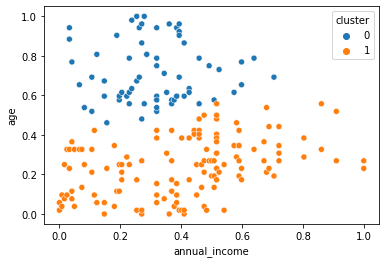

In [80]:
sns.scatterplot(x='annual_income', y='age', data=X_scaled, hue='cluster')

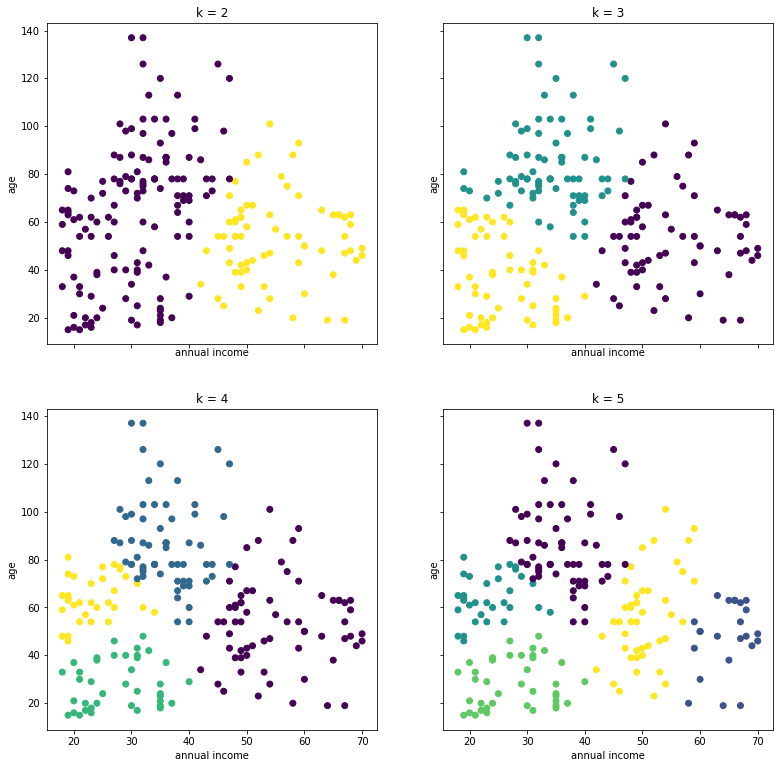

In [81]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='age')

In [12]:
# create, fit and predict on features
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [13]:
df['cluster'] = kmeans.predict(X)

In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,34.347826,82.826087
1,28.360000,31.440000
2,55.034483,50.344828


Text(0.5, 1.0, 'Visualizing Cluster Centers')

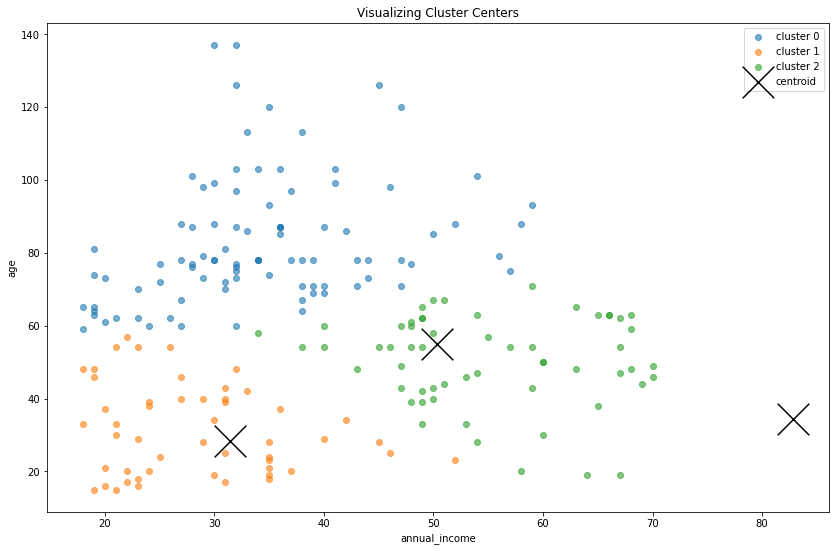

In [16]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

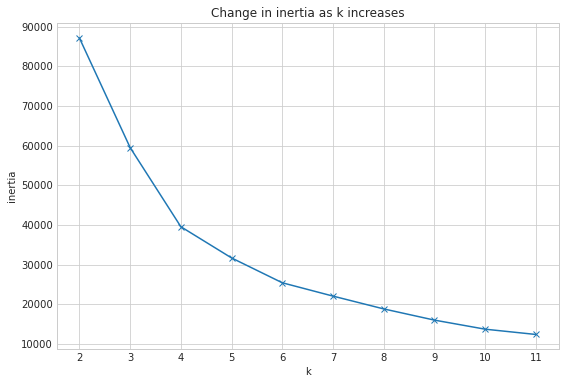

In [17]:
#this should let me visualize the elbow
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# so I would say the elbow is at 5

In [18]:
# and now I will rerun this with the above k
# create, fit and predict on features
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [19]:
df['cluster'] = kmeans.predict(X)

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,37.222222,78.944444
1,32.673913,26.869565
2,56.081633,52.551020
3,36.600000,109.700000
4,25.064516,59.483871


Text(0.5, 1.0, 'Visualizing Cluster Centers')

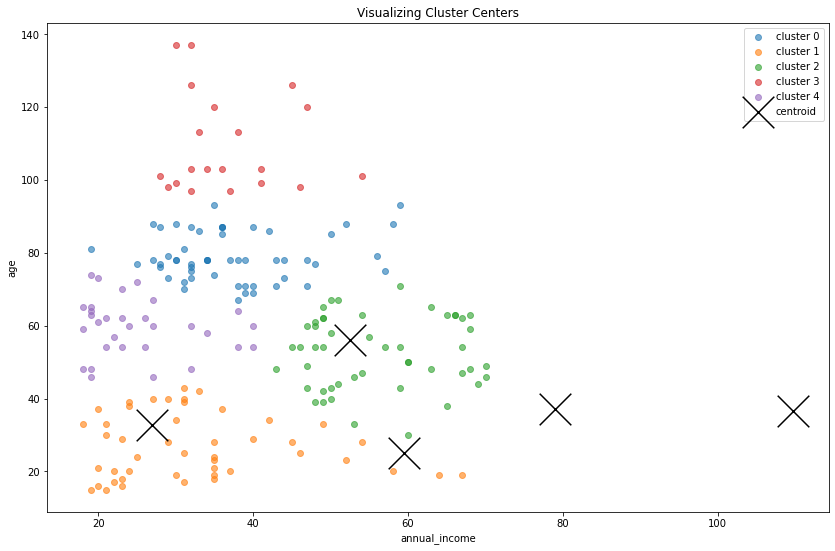

In [21]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

In [26]:
# that's not optimal so I will look for a better k values, let's try 4
# create, fit and predict on features
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [27]:
df['cluster'] = kmeans.predict(X)

In [28]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,31.958904,72.958904
1,30.346939,29.265306
2,39.000000,106.500000
3,55.814815,51.777778


Text(0.5, 1.0, 'Visualizing Cluster Centers')

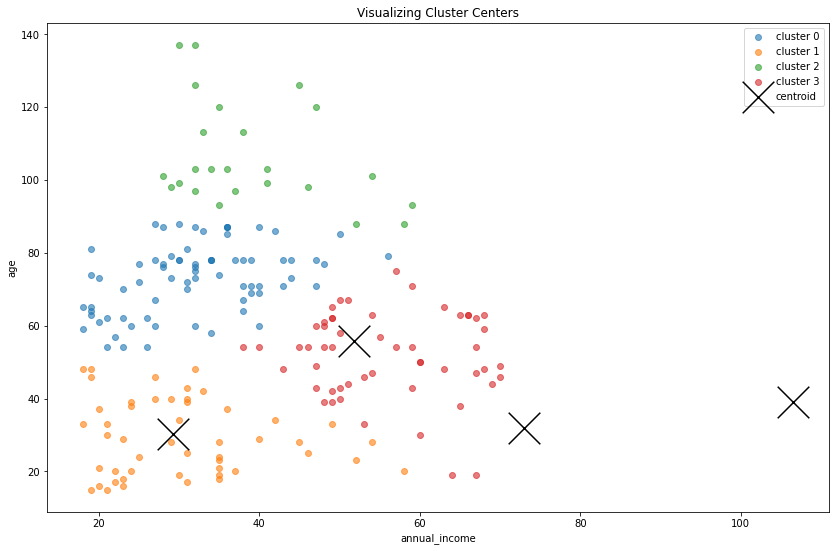

In [29]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

In [30]:
# this doesn't look much better so I'll try 2 now
# create, fit and predict on features
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [31]:
df['cluster'] = kmeans.predict(X)

In [32]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,35.126316,82.421053
1,42.219048,40.780952


Text(0.5, 1.0, 'Visualizing Cluster Centers')

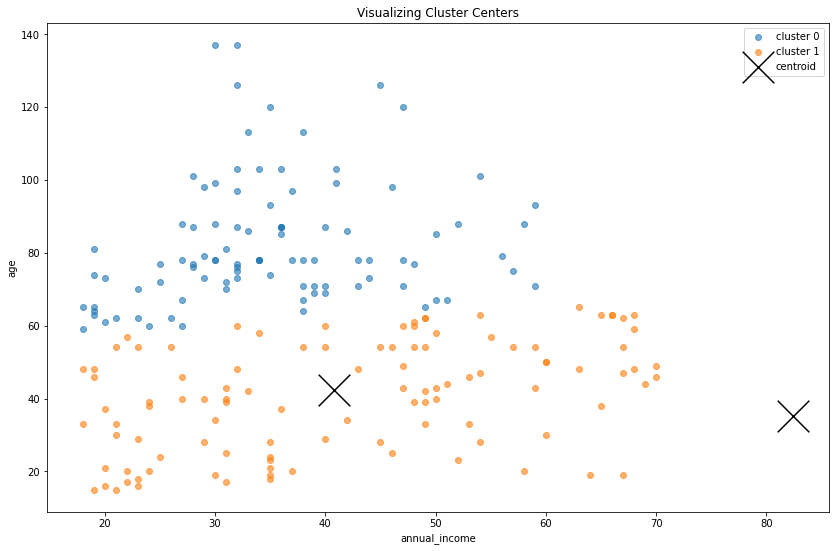

In [33]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

In [50]:
# now I'm going to try this a different way since the bottom right centroid above doesn't want to play nice
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

kmeans.predict(X)

kmeans.cluster_centers_

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

centroids = df.groupby('cluster')['annual_income', 'age'].mean()
centroids

,annual_income,age
cluster,,
0,82.421053,35.126316
1,40.780952,42.219048


<AxesSubplot:xlabel='annual_income', ylabel='age'>

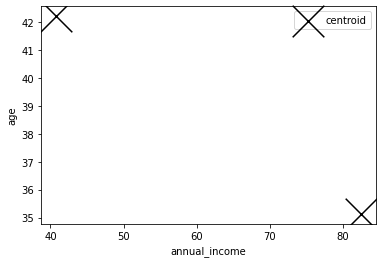

In [39]:
centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

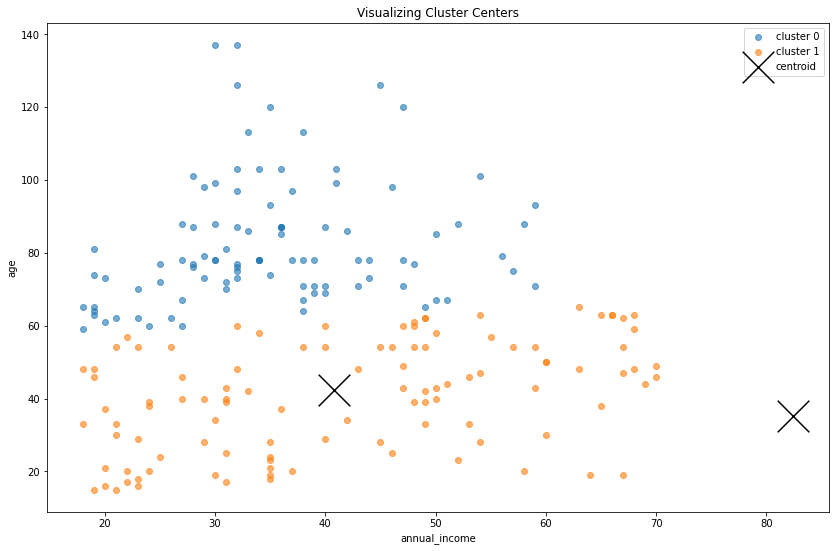

In [51]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

In [52]:
# still no better results let's go to the other extreme and use a k of 9
# now I'm going to try this a different way since the bottom right centroid above doesn't want to play nice
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

kmeans.predict(X)

kmeans.cluster_centers_

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

centroids = df.groupby('cluster')['annual_income', 'age'].mean()
centroids

,annual_income,age
cluster,,
0,82.421053,35.126316
1,40.780952,42.219048


Text(0.5, 1.0, 'Visualizing Cluster Centers')

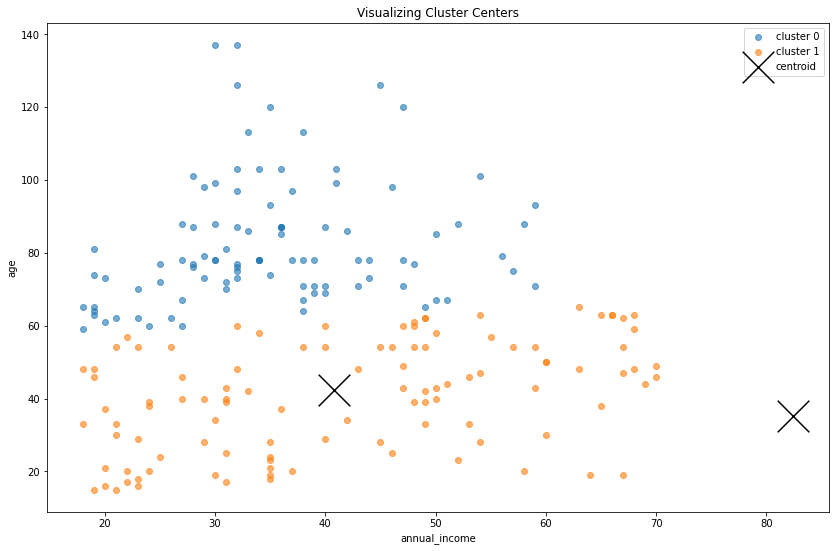

In [53]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

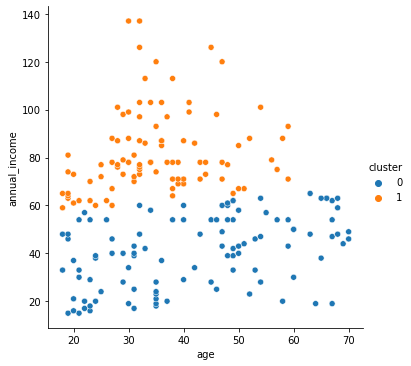

In [55]:
# let's try the example straight out of the lesson k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

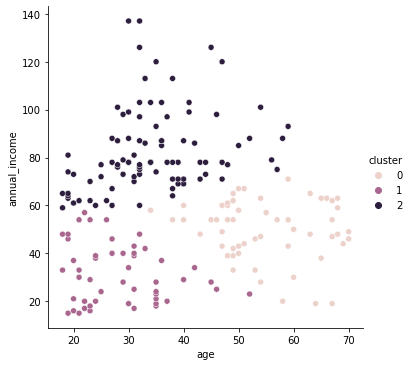

In [56]:
# let's try the example straight out of the lesson k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

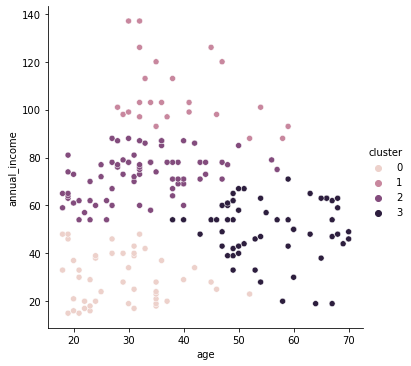

In [57]:
# let's try the example straight out of the lesson k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

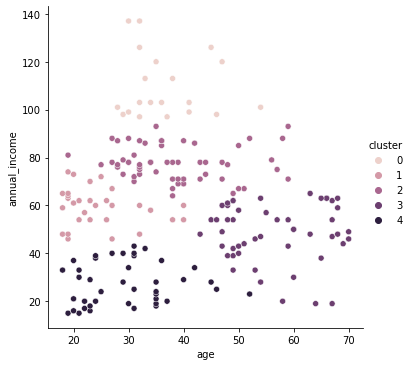

In [58]:
# let's try the example straight out of the lesson k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')